In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [6]:
k = [2,5,7]
iris = datasets.load_iris()
x = iris.data[:, 2:4]
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
h=0.02

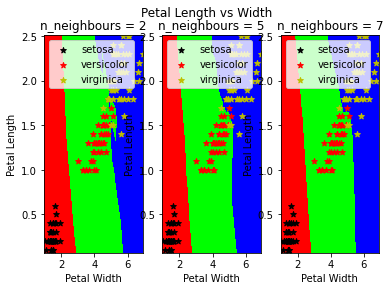

In [9]:

cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
plt.close('all')
fig,axs = plt.subplots(1,3)
axs = axs.ravel()
for j,ax in zip(k,axs):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(x,y)
    x_min,x_max = x[:,0].min()-h,x[:,0].max()+h
    y_min,y_max = x[:,1].min()-h,x[:,1].max()+h
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    p = knn.predict(np.c_[xx.ravel(),yy.ravel()])
    p = p.reshape(xx.shape)
    ax.pcolormesh(xx,yy,p,cmap = cmap_bold,shading='auto')
    
    for y_val, (color,name) in enumerate(zip(['k','r','y'], iris.target_names)):
        ax.scatter(x[:,0][y==y_val],x[:,1][y==y_val],c=color,marker='*',label=name)
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Petal Length')
    ax.legend()
    ax.set_title(f'n_neighbours = {j}')

fig.suptitle('Petal Length vs Width')
plt.show()    
